THORIQ HADIWINATA - TUGAS 2

LINK : "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"


In [34]:
%matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend
import matplotlib.pyplot as plt
# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy

# Seaborn style on matplotlib plot, menentukan jenis graph. Untuk jenis graph lain bisa dilihat di
# https://python-graph-gallery.com/199-matplotlib-style-sheets/
import numpy as np
from sklearn.cluster import KMeans


In [35]:
import pandas as pd


# Membaca dataset student_lifestyle.csv
dataset = pd.read_csv('penguins.csv')
url = ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
names = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
dataset = pd.read_csv(url, skiprows=[0], names=names)
dataset = dataset.dropna()


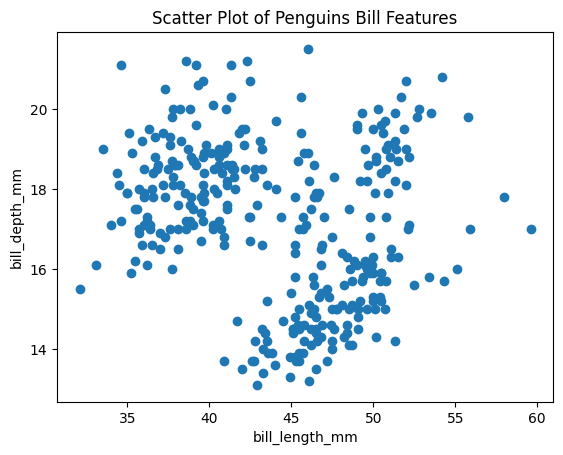

In [36]:
# Pilih dua fitur untuk divisualisasikan
# Ganti nama kolom sesuai dengan dataset Anda
features = dataset[['bill_length_mm', 'bill_depth_mm']]

# Membuat scatter plot dari dua fitur yang dipilih
plt.scatter(features['bill_length_mm'], features['bill_depth_mm'])

# Berikan label sumbu x dan y
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')

# Berikan judul pada plot
plt.title('Scatter Plot of Penguins Bill Features')

# Tampilkan plot
plt.show()

In [37]:

X = np.array(list(zip(features['bill_length_mm'], features['bill_depth_mm']))).reshape(len(features['bill_depth_mm']), 2)
SSE = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    SSE.append(kmeanModel.inertia_)

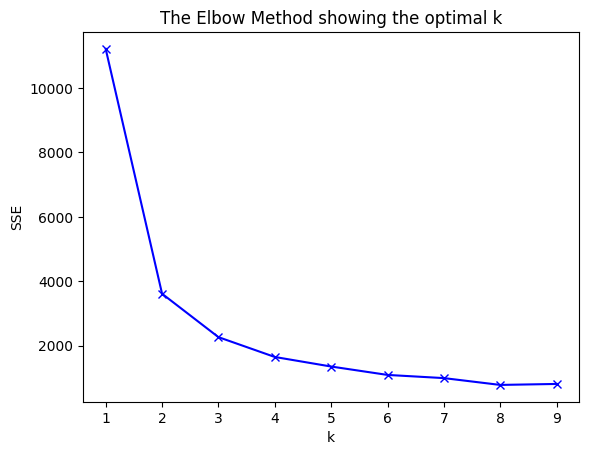

In [38]:
# Plot the elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()


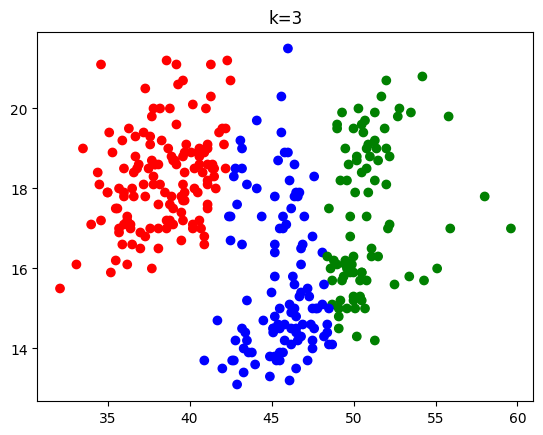

In [39]:
y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.plot()
LABEL_COLOR_MAP = {
    0: 'r',
    1: 'g',
    2: 'b',
}

label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(features['bill_length_mm'], features['bill_depth_mm'], c=label_color)  # Use column names for features
plt.title("k=3")
plt.show()

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [47]:
X, y = make_blobs(n_samples=800, n_features=2, centers=3)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

<Figure size 640x480 with 0 Axes>

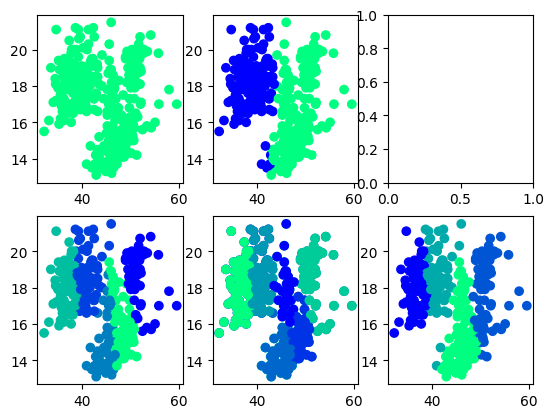

In [43]:
figure, ax = plt.subplots(2, 3)
K = range(1, 7)
for k in K:
    if k < 3:
        row = 0
        column = k - 1
    else:
        row = 1
        column = k - 5
    kmeanModel = KMeans(n_clusters=k).fit(X)
    y_pred = kmeanModel.fit_predict(X)
    # Access features using column names instead of numeric indices
    ax[row][column].scatter(features['bill_length_mm'], features['bill_depth_mm'], c=y_pred, cmap='winter_r')

plt.show()

In [50]:
for k in range (1, 4):
# Menentukan jumlah cluster
  kmeans = KMeans(n_clusters=k, random_state=1)
# Fitting input data
  kmeans = kmeans.fit(X)
# Mendapatkan cluster labels
  labels = kmeans.predict(X)
# Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
  interia = kmeans.inertia_
  print ("k:",k, " cost:", interia)
  print ("")

k: 1  cost: 40286.29530789896

k: 2  cost: 5381.795812371669

k: 3  cost: 1720.4287291157982



In [51]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)

0.7197447727032297